In [110]:
import tensorflow as tf
import tensorflow.contrib.layers as tfl
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imresize
test_img=plt.imread('/Users/vmangipudi/Downloads/CADL-master/session-5/dst/img_align_celeba/000403.jpg')
print (test_img.shape)
tf.reset_default_graph()
image_size=32
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

data=unpickle('/Users/vmangipudi/Downloads/cifar-10-batches-py/data_batch_1')
dat=data[b'data']
lbl=np.array(data[b'labels'])
auto_indxs=np.where(lbl ==1)[0]
auto_dataset=[]
for i in range(1):
    im=np.rollaxis(np.rollaxis(np.reshape(dat[auto_indxs[i]],[3,image_size,image_size]),2),2)
    
    #print(im.shape)
    auto_dataset.append(im)
#plt.imshow(auto_dataset[2])  
n_neurons = [2, 50, 50, 50, 50, 50, 50]
X = tf.placeholder(tf.float32, shape=[None, 2], name='X')
Y = tf.placeholder(tf.float32, shape=[None, 3], name='Y')


# We'll first collect all the positions in the image in our list, xs
xs = []

# And the corresponding colors for each of these positions
ys = []

# Now loop over the image
for i in range(len(auto_dataset)):
    img=auto_dataset[i]
    print(img.shape)
    for j in range(image_size):
        for k in range(image_size): 
            xs.append([j,k])
            ys.append(img[j,k])

# we'll convert our lists to arrays
xs = np.array(xs)
ys = np.array(ys)

# Normalizing the input by the mean and standard deviation
xs = (xs - np.mean(xs, 0, keepdims=True)) / np.std(xs, 0, keepdims=True)
ys = (ys / 255.0)

# and print the shapes
xs, ys

(218, 178, 3)
(32, 32, 3)


(array([[-1.67874412, -1.67874412],
        [-1.67874412, -1.57043805],
        [-1.67874412, -1.46213197],
        ..., 
        [ 1.67874412,  1.46213197],
        [ 1.67874412,  1.57043805],
        [ 1.67874412,  1.67874412]]),
 array([[ 0.66666667,  0.70588235,  0.77647059],
        [ 0.65882353,  0.69803922,  0.76862745],
        [ 0.69411765,  0.7254902 ,  0.79607843],
        ..., 
        [ 0.29411765,  0.30980392,  0.32156863],
        [ 0.27843137,  0.29411765,  0.30588235],
        [ 0.28627451,  0.30196078,  0.31372549]]))

[[ 0.999641    0.59840727  1.0431397 ]
 [ 1.00023401  0.59408909  1.11501372]
 [ 0.8139888   0.65239525  0.9740364 ]
 ..., 
 [ 5.09105968  2.60184002  1.64179838]
 [ 4.2794714   1.28122902  0.68997562]
 [ 4.1712575   2.23538113  1.7904762 ]]


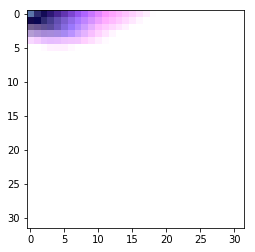

[[ 1.22549105  1.18196464  1.10486901]
 [ 1.24865055  1.15037215  1.19726741]
 [ 1.00885689  1.18783164  1.0607444 ]
 ..., 
 [ 6.99561167  4.09771538  2.96455073]
 [ 2.51373672  4.26506519  2.58362865]
 [ 3.88593817  4.46556568  2.65268183]]


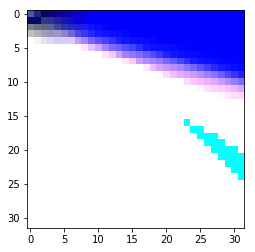

[[  1.19274676   1.53807509   1.4405607 ]
 [  1.14688134   1.47281373   1.38278806]
 [  1.25425243   1.86771536   1.46507967]
 ..., 
 [  6.54460144  13.7188158    7.57737303]
 [  8.6446476    4.00927019   3.27024484]
 [  8.03007507   6.60971498   3.60704327]]


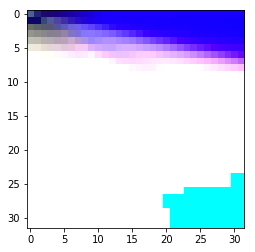

[[  1.45942259   1.69471669   1.03852677]
 [  1.50519073   1.75928748   1.06006169]
 [  1.80258405   1.97404373   1.09376979]
 ..., 
 [ 10.98954201   9.59661674   2.765347  ]
 [  6.79977989   0.91971058   2.33547997]
 [  9.08379841   3.62936497   2.38482356]]


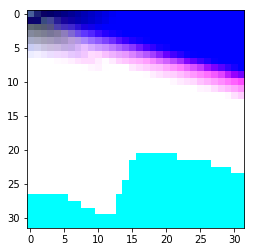

[[ 0.35436898  0.80425304  0.87723881]
 [ 0.35549608  0.82066494  0.93094522]
 [ 0.3484773   0.82253641  0.93087882]
 ..., 
 [ 0.65763956  1.88422763  2.1192975 ]
 [ 0.66051871  1.74243903  1.59705544]
 [ 0.66006321  1.79567349  1.75580978]]


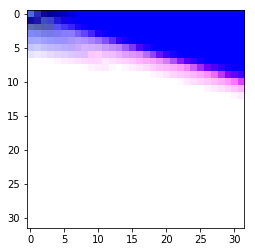

[[  0.56231606   1.34096849   1.47053206]
 [  0.35917285   1.01047659   1.08192718]
 [  0.93267781   1.2688514    1.07268178]
 ..., 
 [ 15.66925621  12.65223503   8.72180843]
 [  0.43616536   3.12745142   5.78939819]
 [  4.05408049   8.03643322   7.84853363]]


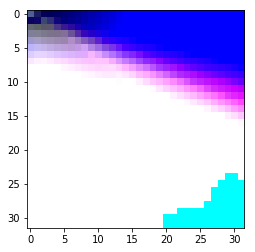

[[  1.8727839    2.03570795   2.17695355]
 [  1.58133411   1.95691276   1.90374482]
 [  2.58173728   2.42715025   2.12388587]
 ..., 
 [ 10.57859135  23.02767372  16.23229408]
 [  7.30883932   1.81011236   3.4534893 ]
 [ 15.90710354  14.63916683  11.23279762]]


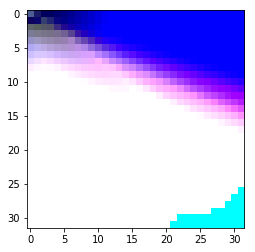

[[  2.84430814   2.32779479   2.87537599]
 [  2.40253758   2.20849371   2.37951279]
 [  3.68975353   2.79951119   2.60317111]
 ..., 
 [  7.96682644  10.97112083  12.01929283]
 [  8.23246956   5.52507257   5.25086355]
 [ 11.16292763   9.35209179  11.24224758]]


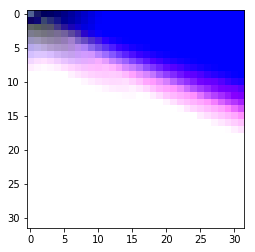

[[  3.5237999    2.73745108   3.61945057]
 [  3.10557008   2.52747345   3.08777666]
 [  3.91827726   2.97582078   3.25284457]
 ..., 
 [  5.31437588   8.51766968   7.21111965]
 [ 10.93564224  10.21806812  10.1275053 ]
 [ 11.68505478  12.01613808  11.81157112]]


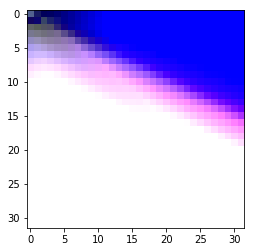

[[  0.88962102   1.82493126   1.99901462]
 [  1.0358628    1.46005797   1.28222334]
 [  2.57711053   1.93584979   1.43183851]
 ..., 
 [  0.74065226   3.10719132   4.99677801]
 [ 21.14708138  18.45394135  14.48724842]
 [ 11.3651228   12.41886425  10.00143242]]


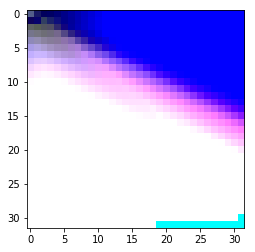

[[ 2.54091597  2.64661384  3.40084124]
 [ 1.83012962  1.90268064  1.66986978]
 [ 2.64498854  2.15083003  1.55474997]
 ..., 
 [ 7.17891026  8.67315769  9.94630146]
 [ 4.73727369  5.57198715  3.28597736]
 [ 5.97052145  7.42987156  6.59967995]]


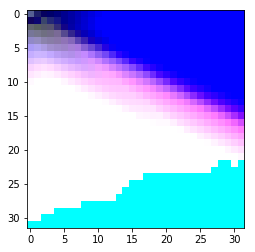

[[  7.0023365    6.90432501   8.63989162]
 [  5.24411345   5.60737085   5.36419964]
 [  4.38509321   5.82680941   5.61788225]
 ..., 
 [ 12.5268507   16.50894356  10.83005238]
 [  5.81006813   5.08045578   8.39533043]
 [ 17.92405891  19.96456146  12.92971706]]


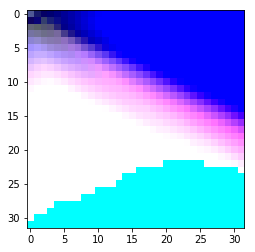

[[  6.24088717   5.52571297   6.22512913]
 [  4.68699074   4.46316433   5.24573183]
 [  5.3165288    4.96535778   4.98249769]
 ..., 
 [ 10.39275551  14.86606407  12.0492239 ]
 [  9.43151188   6.32046938   7.87757111]
 [ 15.65601254  14.62069798  12.45942497]]


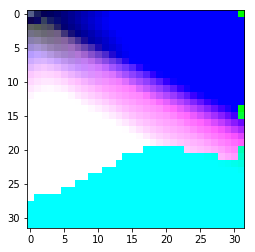

[[  9.29914379  11.26005268   8.82999611]
 [  4.13897562   6.6628108    5.8108201 ]
 [  9.46763611   6.74563599   3.21694636]
 ..., 
 [  3.4508462    8.62470627   9.02131081]
 [ 16.55243683  14.6297226   10.79850388]
 [ 13.29933071  16.73367119  11.27141094]]


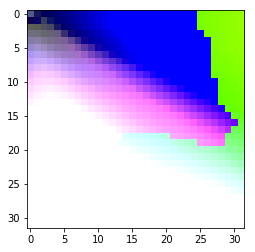

[[  4.81343317   4.54059649   4.86262941]
 [  0.56167275   1.39273131   0.83844906]
 [  2.51189184   2.04809761   0.44119379]
 ..., 
 [  6.15208101  13.28341007  10.01910591]
 [  7.83785009   8.85758305  11.62023067]
 [ 29.41347694  17.54953575  13.75788784]]


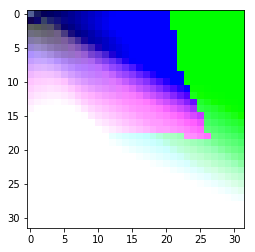

[[  1.01145589   1.77108955   0.29018426]
 [  6.3447938    4.65679359   4.53284407]
 [  2.21124482   4.5502553    5.26888371]
 ..., 
 [ 11.2359581    8.75954914  10.05481625]
 [  7.42275333  10.18618679  11.56232643]
 [ 17.1292572   11.14547062  16.36645699]]


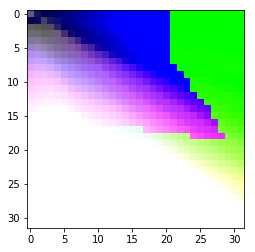

[[  3.91851521   3.52142501   3.66610169]
 [  2.78166199   2.35914183   3.16668367]
 [  4.07002783   2.99485397   3.46811056]
 ..., 
 [ 12.69432354   8.33452606   6.54544163]
 [  4.9151597    8.82642365  13.43883419]
 [ 10.16954708   9.97882938  15.66071701]]


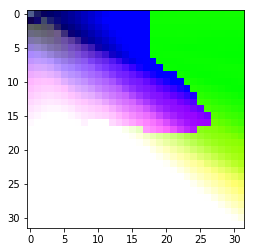

[[  9.15283871   7.24254274   5.81568813]
 [  3.8842864    3.9529624    5.46176672]
 [ 11.08233166   6.51171017   6.31396055]
 ..., 
 [  6.48909855   8.61404991   7.40200138]
 [ 10.29059982  12.51144409  11.00479412]
 [ 20.77483368  13.42648029  10.63903809]]


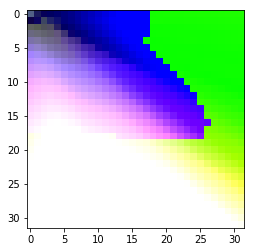

[[  3.79551029   3.14217687   6.09484959]
 [  2.07254982   1.30240107   1.83437431]
 [  4.35271645   2.11741829   1.98576272]
 ..., 
 [  5.17575836   7.6939702    4.20400572]
 [ 11.94693756  12.77244854  15.13058758]
 [ 10.67409515  11.66773891   8.95022583]]


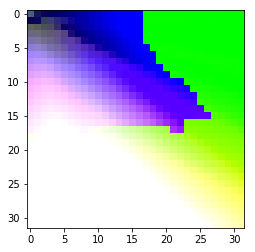

[[  5.33692503   6.91611958   4.22818756]
 [  4.85116291   4.87243032   6.89526415]
 [  5.15798998   7.06414223   8.61975765]
 ..., 
 [  6.34141874   9.04443073   8.81865501]
 [  8.56667709   8.6172781   13.86907101]
 [  8.115345     9.11779499   8.45735455]]


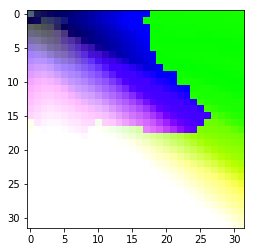

[[  5.61250019   5.43795395   5.43236637]
 [  4.17128468   4.42692471   5.22717476]
 [  5.45813417   5.05256796   5.8218503 ]
 ..., 
 [  9.59270573  12.47665977  10.48216057]
 [ 10.28453159   9.85816383  11.42510223]
 [ 20.18411255  13.85096073  11.7784853 ]]


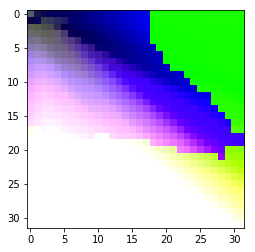

[[  7.90313768   9.56943798   6.73437262]
 [  4.39051437   3.16028047   5.37973642]
 [  7.28485775   7.25525856   6.70787287]
 ..., 
 [ 12.34485149  17.90028381  12.40437222]
 [  6.98838758   4.84611368   7.5533433 ]
 [ 13.74463367  15.11859417  12.81845856]]


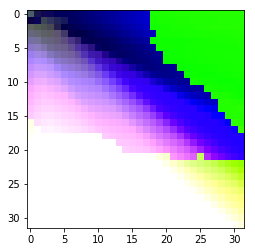

[[ 2.18998313  4.68047762  4.5762105 ]
 [ 1.96083236  3.0127697   1.97114134]
 [ 2.19961286  3.97174549  2.37019992]
 ..., 
 [ 3.77004671  8.52223206  7.50226259]
 [ 3.70239162  6.86997557  7.66365719]
 [ 3.88886166  8.45469284  8.14304924]]


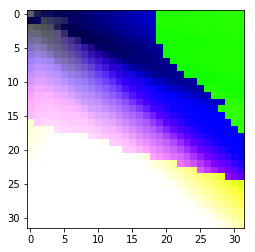

[[  9.35945415   8.64293385  14.16253567]
 [  2.08782744   1.13710487   0.34744042]
 [ 10.39246941   4.43108559   0.81933427]
 ..., 
 [ 10.2942791   10.63317299  11.39680672]
 [  6.84120035   7.59799385   7.26104307]
 [ 14.87279892  13.79403687  14.78379345]]


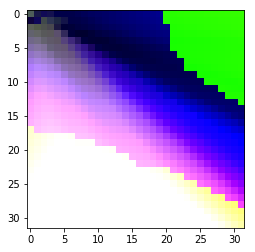

[[  8.32004356   9.08681297   7.61239147]
 [  5.81727457   5.82500982   4.12517977]
 [  6.58118677   7.58534145   5.17380142]
 ..., 
 [ 12.74748421  17.68983269  13.16508865]
 [  4.45392132   4.46269655   8.23244858]
 [ 14.49207211  13.64803028  15.10816288]]


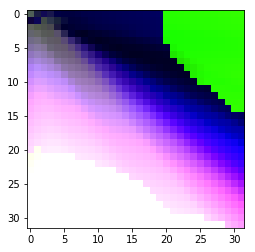

[[  9.62637901  17.0586834   15.60879421]
 [  5.19339609   1.64843404   1.28441966]
 [  7.58407974   7.68001747   3.89471149]
 ..., 
 [  2.76950216   3.99060059   4.67996931]
 [  9.55123806  14.47673988  13.72714806]
 [  7.43813658  11.9345026   12.15784454]]


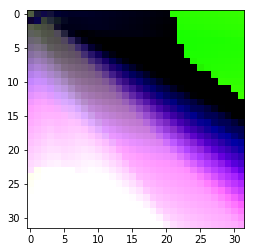

[[ 10.51707649  10.8786869    7.75322771]
 [ 10.92114544   9.29850197   7.92165995]
 [  2.58348298   9.91610241  12.32669258]
 ..., 
 [  5.97588444  15.30338001  11.40151691]
 [ 11.57068634   6.11794901  11.14335632]
 [ 22.82580185  17.44833374  13.86889267]]


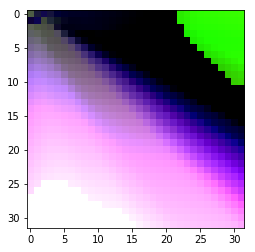

[[  7.1313529   10.5882616    5.64786482]
 [  6.7376523    7.07097292   8.37209702]
 [  4.77834749   9.25824261   9.28848839]
 ..., 
 [  4.66524982   4.62563801   3.99582744]
 [  8.71389198  11.49030972  10.3608284 ]
 [  9.2632513   13.29447937  18.37209702]]


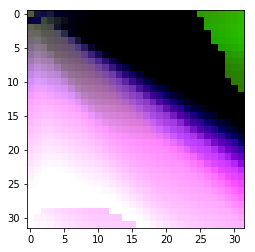

[[ 12.12018394  22.9025631    5.99940252]
 [  9.66485214   2.29641199   9.00213814]
 [  5.09374523  13.99923611  12.81925392]
 ..., 
 [  6.16752052  12.18972301   3.58034372]
 [ 13.92175865  13.96196556  22.86979103]
 [ 16.67817497  20.85682106  15.2398901 ]]


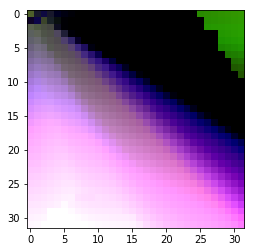

[[ 15.54829025  19.04964447  10.57264519]
 [  6.80205965   3.28657627   4.56607819]
 [  8.6221714   12.95597172   7.46542597]
 ..., 
 [ 13.52666759  16.20403481  12.49284077]
 [  5.1990428    2.93376064   7.77850628]
 [ 15.04847336  13.83196735  12.84850311]]


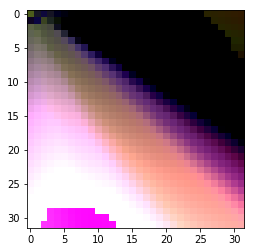

[[  1.14983857   1.32248592   2.04391742]
 [  0.94789314   0.85899621   1.19653177]
 [  1.30527949   1.08327377   1.30208457]
 ..., 
 [  3.75681782  12.91218281  10.66633987]
 [ 15.52784824  10.85683632  14.84752274]
 [ 21.66113281  19.44580269  18.61651993]]


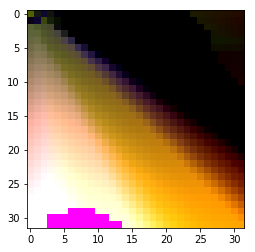

[[  8.89917755   8.8489027    7.2167263 ]
 [  5.29343462   7.88947487   6.21134424]
 [  7.17956018  10.4691658    7.49926281]
 ..., 
 [ 10.24501038  17.04959679   5.29108047]
 [  6.0531888    3.2424221   16.97663116]
 [ 17.43290138  17.63556671  17.32142639]]


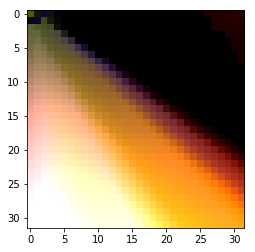

[[ 11.55613136  10.84240913   9.11386585]
 [  8.41844749   6.86503649   7.93422222]
 [  4.49438715   9.37564182  11.19026661]
 ..., 
 [ 11.487813    19.1214962   17.76521492]
 [ 11.15323448   4.33125639  12.62345314]
 [ 19.10785675  19.40187645  24.30917549]]


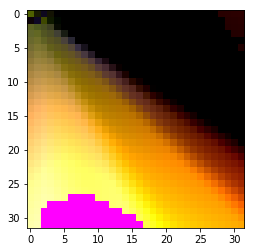

[[ 17.27833557  26.75119781   7.64094925]
 [  3.91354179   4.70403099   7.61717129]
 [ 11.87510586  15.78260708  12.02122879]
 ..., 
 [ 12.82170105  22.0307312    5.94100857]
 [  6.37264395   6.00412083  23.81297493]
 [ 19.66292763  23.04350281  18.50832176]]


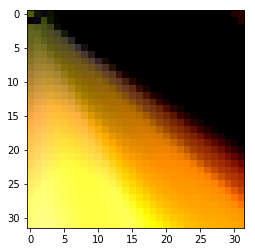

[[  9.17471313   6.68348551  21.10582733]
 [  1.74418819   0.52293396   0.63823527]
 [ 11.73454189   3.69921947   1.42170787]
 ..., 
 [  1.87166417   7.16975927   1.53478873]
 [ 20.84387207  14.09233093  27.05265236]
 [ 17.53390312  16.33351707   2.68092895]]


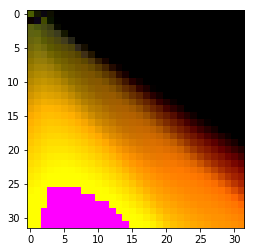

[[ 15.71165371   8.57865715   4.64199686]
 [  8.85581303   8.04979134  10.44899845]
 [  6.86741781   9.00549507  11.44861317]
 ..., 
 [ 10.92551804  13.85016441   8.45097446]
 [  7.0866847    9.75893784  18.97885132]
 [ 17.42378235  19.97831917  15.38345528]]


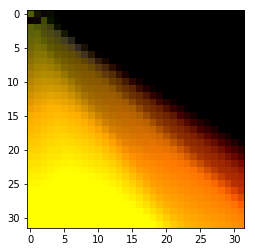

[[ 17.14925194  12.06278038   4.33809185]
 [ 10.42247868  10.59472179  11.58133698]
 [  7.47409964  11.51686764  12.31851959]
 ..., 
 [ 13.81872177  17.37686348  16.16831017]
 [  6.44945335   9.93499565  15.59807873]
 [ 28.855793    19.61707878  14.94389629]]


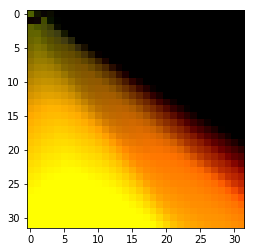

[[ 10.04008961  12.39301586  14.07626915]
 [  7.39978695   5.09192085   8.06755352]
 [  5.09713364   9.32209778  11.26370049]
 ..., 
 [  7.91205025  17.84025002  11.74384212]
 [ 15.77077293   9.61046124  20.66544342]
 [ 21.00512886  23.38979912  16.51576042]]


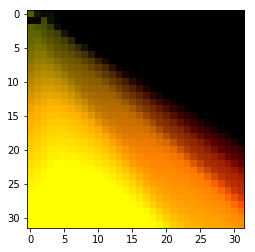

[[ 12.98638439  14.3242569    8.84132195]
 [ 12.57502556  12.59979534  10.77174187]
 [  4.1569128   15.39477825  14.6110096 ]
 ..., 
 [  6.13858795  21.84078026  15.14637089]
 [ 20.50662613  15.81774712  26.32207298]
 [ 14.18894577  22.25387001   7.79343557]]


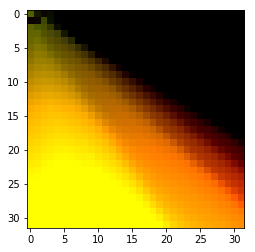

[[ 21.23540115  22.87965012  14.04296398]
 [ 10.54670334   9.59265518  11.22565079]
 [  4.31651688  15.03224277  15.416749  ]
 ..., 
 [ 13.93234348  16.46590233  17.27005005]
 [ 13.82885838   4.71298361  17.9822216 ]
 [ 22.71320343  19.18634605  15.72193909]]


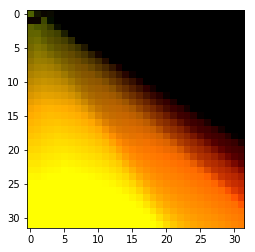

[[  5.81907845   0.09967718   0.93074208]
 [  9.51514244   6.13397455  10.9885025 ]
 [  2.70056534   2.28657889   8.46691799]
 ..., 
 [ 12.88009071  12.07500553  13.48393536]
 [  6.79144716   9.75498676  14.8341198 ]
 [ 19.10992432  19.67533493  18.59900093]]


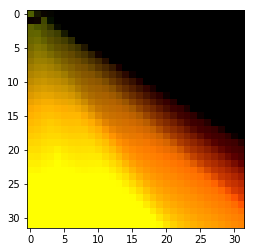

[[ 10.12403393  19.60116577  17.39753723]
 [  7.27050877   9.46072388   5.9917779 ]
 [  6.91682673  14.07441711   7.8138833 ]
 ..., 
 [  7.18223095  11.68695831   3.20379758]
 [ 10.32962894  13.7574091   20.1967926 ]
 [ 11.76046944  22.65903664  17.73866081]]


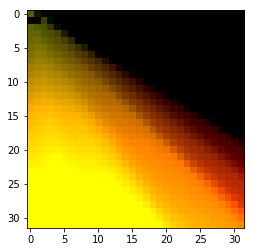

[[ 19.81900597   9.97112274   2.65667439]
 [ 10.11061668  11.45444012  14.03921986]
 [  8.71909809  11.91996098  17.21890068]
 ..., 
 [ 15.2722683   22.09545326  22.97574997]
 [ 11.29766941   4.57980633  10.41572762]
 [ 23.32413483  17.72211647   4.842803  ]]


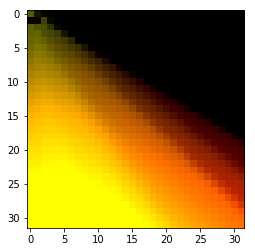

[[  8.07242489   1.57977343   0.36865503]
 [ 10.76841354  13.69246387  16.96927643]
 [  2.06145453   2.83451819   7.1710639 ]
 ..., 
 [ 15.20555878  21.26302338  20.37400818]
 [ 11.23563957   9.95997429  16.93084145]
 [ 24.74757195  26.51634216  24.76586723]]


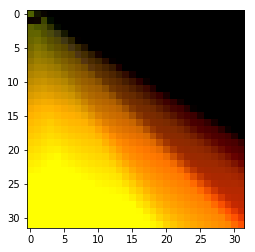

[[  9.14063549  10.02017975   6.34408855]
 [ 10.76018524  11.83048248  11.07660389]
 [  5.35651302  12.48550701  12.49516201]
 ..., 
 [ 12.96093941  15.50670624   9.27906704]
 [ 11.50475788  13.24096966  18.44708633]
 [ 18.49785805  21.41815567  15.11722374]]


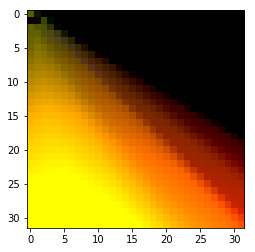

[[ 16.42693901  20.65011024  14.72387314]
 [  3.92374372   4.00030279   4.46358395]
 [ 12.12848377   5.28244829   4.62867546]
 ..., 
 [ 10.41189766  16.98753357  11.85350323]
 [ 18.15764999  18.25960159  24.10171318]
 [ 25.89155579  24.08595085  13.70775604]]


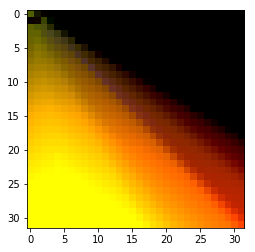

[[ 18.70857811  13.78926754   3.06895804]
 [ 10.24518681   8.41795158  15.34292698]
 [  4.79051495   8.98612595  13.11811352]
 ..., 
 [  1.4738692    1.78743005   0.81748843]
 [ 25.07589722  37.38066864  14.48228836]
 [ 13.03836727   7.05441713   2.98048258]]


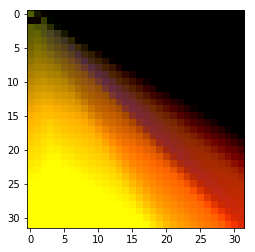

[[ 10.69204998  29.22608948  21.05775452]
 [  2.50406051   5.45591164   5.01815224]
 [ 15.10826015   9.61178589   6.33211279]
 ..., 
 [ 16.97011375  21.39132881  19.05037498]
 [  3.66999888   1.1651051    3.70630598]
 [ 19.47603989  23.83642387  20.12266541]]


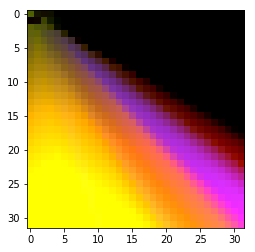

[[ 15.93102169  20.90498734  15.74521923]
 [ 10.09792042   8.57482433   8.35863972]
 [ 10.71809483  12.0148201   11.04065323]
 ..., 
 [  4.64451838  21.57681465  15.88211918]
 [ 19.554636    11.402174    25.97260475]
 [ 13.20523643  18.63513947   3.5125041 ]]


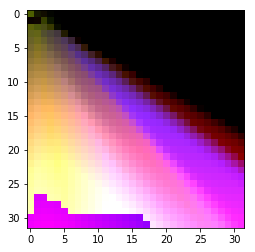

[[ 12.37725735  12.85211945  15.60774136]
 [  6.59637165   9.28354645   7.14767742]
 [  9.83039474  10.28897667   8.73367119]
 ..., 
 [  2.71602583  13.17700672   0.67788732]
 [ 24.68080902  14.70694351  23.95186234]
 [ 25.01948547  17.64941406  11.20082092]]


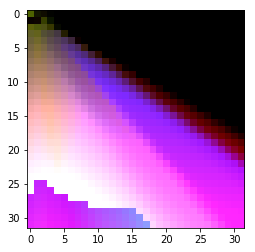

[[ 16.72327995   8.55641556   6.14028263]
 [ 14.82448006  10.28727245   6.48526955]
 [  0.42978999   4.48194933   5.30276966]
 ..., 
 [  3.38916183   6.01790237   8.2115984 ]
 [ 21.9047966   14.69235039  13.13708878]
 [ 10.97281551   7.59015512   8.51106739]]


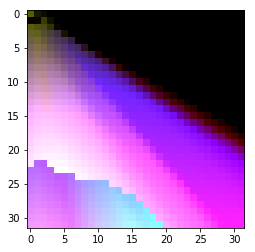

[[ 12.55320358   8.47184849   7.34449625]
 [  7.04574299  10.61324501   6.71701717]
 [ 11.4203825   10.11834717   8.96700001]
 ..., 
 [ 18.84140396  15.64905834  21.14305115]
 [ 15.06197453  19.17441177  25.99674034]
 [ 26.13712692  14.97131157  16.13261604]]


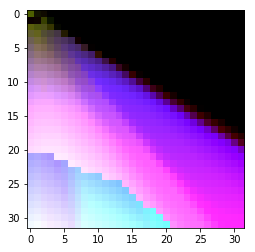

[[ 11.96431732  14.66954994  17.13156128]
 [  8.14958668  11.15995216  11.28102493]
 [  9.33062458  12.05487347  14.62924099]
 ..., 
 [ 10.48618507  15.7269001    4.71962357]
 [ 11.69165993   9.82316589  26.30908775]
 [ 14.70223713  15.36992455  24.84876251]]


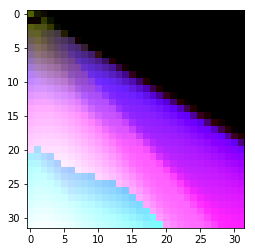

[[ 19.36690331  24.20005417  19.42612267]
 [  6.31499338   9.31868744   8.76606846]
 [ 15.71063614  15.86333656  14.92196274]
 ..., 
 [ 17.35980797  18.52959442  18.62420845]
 [  6.09411335   3.76352048   7.70005608]
 [ 15.18768215  18.59019279  20.59213829]]


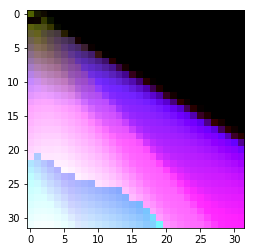

[[ 15.31927586  18.83940315   6.64726782]
 [ 10.06396198  16.64577866   5.85079908]
 [  8.44932747  15.36341858   5.67379427]
 ..., 
 [  8.75805569  17.42179871  10.96726894]
 [ 18.34944916  15.6893158   13.30830479]
 [ 19.52632332  18.32243156  12.00607681]]


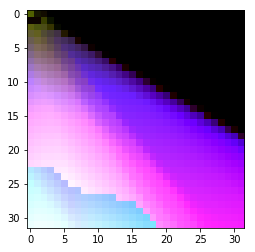

[[ 17.35608864  16.49571228  14.80028343]
 [  8.80764961  15.04620075   9.72244167]
 [ 13.06719112  13.85618019  10.98429203]
 ..., 
 [ 20.36596107  20.71121025  18.90961266]
 [ 14.29071045   7.16754627  20.02586365]
 [ 25.81395721  27.34066582  17.1040287 ]]


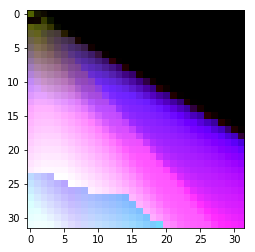

[[ 15.0418396   24.37735939  22.17741203]
 [  9.40673447  16.41407967  15.77534103]
 [ 12.86727715  17.36948204  17.83337784]
 ..., 
 [  1.49905694   2.15563703   0.29745358]
 [ 19.7359314   20.97798729  20.9529953 ]
 [ 17.07823563  15.24441814   9.49219131]]


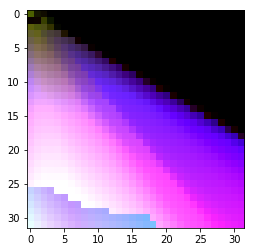

[[ 14.88967705  16.86292076   8.84515953]
 [ 13.6218853   18.63708687  19.43469238]
 [ 10.58542156  16.41450882  18.17140579]
 ..., 
 [ 19.5874691   25.09379768  20.51128006]
 [  9.11742306   6.75996733  23.40489006]
 [ 28.24509048  28.43613625  18.13659096]]


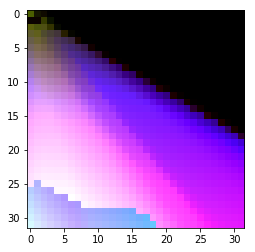

[[ 16.34577751  38.2884407   27.88723946]
 [  8.59398174  20.63741684  10.09771824]
 [ 16.94713211  24.66975021  19.72055817]
 ..., 
 [  6.49427176   8.19647408   5.56113338]
 [ 25.94117546  29.5819397   29.66529274]
 [ 25.46755409  16.60245132  12.97821903]]


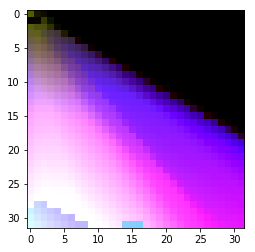

[[ 16.24135399  17.39847183  30.2682209 ]
 [ 11.1376524   14.37095451  21.07095146]
 [ 11.13292027  12.67635536  23.1566925 ]
 ..., 
 [ 17.19939423  20.18926811  24.1534481 ]
 [  7.55818796   4.30314636  12.63616848]
 [ 22.57072258  21.31182289  22.93097687]]


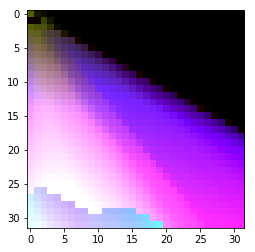

[[  9.5777607    2.00459504   4.44940472]
 [ 10.02528381  13.53812885  15.16415596]
 [  7.81653595  10.37485409  12.11013126]
 ..., 
 [  9.96692753   1.86989808   0.37988511]
 [ 10.96145535  21.26672935  23.7916317 ]
 [ 14.16185379  30.51940536  20.32474136]]


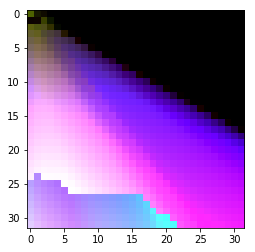

[[  7.42315006   5.56106806   9.60027409]
 [  5.55866718   7.7947731    4.40609264]
 [ 15.40467167  19.94837189  14.68558598]
 ..., 
 [ 22.99644089  22.2772789   30.86496162]
 [  5.35297585  12.49681664  14.7038126 ]
 [ 10.02107239  21.89625931  24.98371124]]


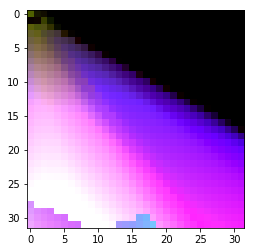

[[ 16.82485008  17.00478172  11.85443878]
 [ 14.06284237  15.08321476  15.22982025]
 [ 13.71898937  12.79375362  14.88068867]
 ..., 
 [ 12.43687344  14.60077286  12.80004501]
 [ 16.51817703  14.48908997  16.50686836]
 [ 18.87639618  17.06795311  15.7346096 ]]


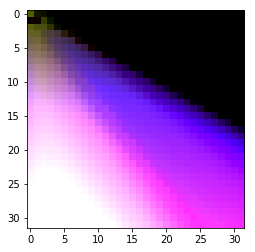

[[ 17.35507774  37.6580658   10.49998474]
 [ 13.44422817  21.3228569    5.24466944]
 [ 18.10925865  44.89738464   7.72355461]
 ..., 
 [  7.67234135  26.22515488  18.22420311]
 [ 16.94628906   3.84810686  14.75082588]
 [ 28.54768753  35.10435867  20.84835625]]


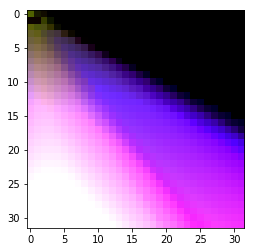

[[ 27.80631447  32.05472183  20.94026184]
 [ 15.02073002  21.28347206  16.64734459]
 [ 22.50976753  14.83388805  13.67183018]
 ..., 
 [ 19.23615074  23.72632217  20.87909698]
 [ 11.27138901  13.50206566  22.41838074]
 [ 19.23524284  27.78137398  27.0062561 ]]


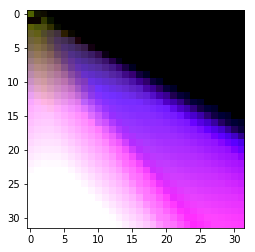

[[ 29.40113831  29.67712593  25.82965088]
 [  6.15560675   6.15007067   0.48320577]
 [ 18.92715073   5.62312365   1.14563215]
 ..., 
 [  9.44497681  17.10037041  19.052948  ]
 [ 16.68261147  13.87618542  12.62144661]
 [ 23.7924881   27.41290855  25.58879852]]


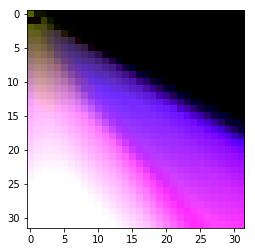

[[ 27.45830727  14.72560692  30.31280327]
 [ 19.38376236  13.63139248  22.35827255]
 [ 14.41869354  12.19230747  22.56596184]
 ..., 
 [  3.41421866  19.59055138  18.50863075]
 [ 28.22212601  21.43099594  41.3697052 ]
 [ 24.87412834  24.12624168  28.98006821]]


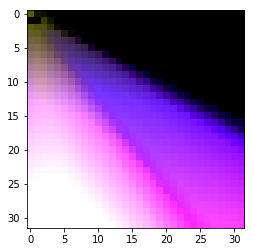

[[  8.32498837  14.58437634  10.7833662 ]
 [ 14.05439377  11.09094238  15.56569195]
 [ 13.07994461  10.37695217  16.33182144]
 ..., 
 [  7.44023085  20.59519768  10.51102257]
 [ 20.81601143  19.05873299  35.74935532]
 [ 15.8222847   19.31676102   3.04895139]]


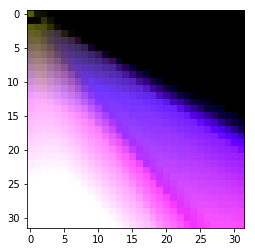

[[ 10.35916901  14.28088474  10.50580215]
 [ 11.93468857  16.54720497  18.1493969 ]
 [ 13.96935558  12.14683342  20.11297989]
 ..., 
 [ 27.58375359  17.4220047   26.39975166]
 [  2.50630069   6.12271643  17.65955544]
 [  5.35122442  14.56035042  21.30270767]]


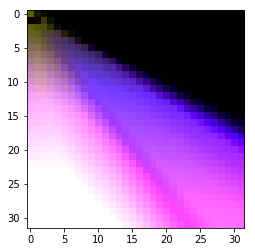

[[ 26.85380363  21.47224808  12.81841087]
 [ 19.03773499  16.88214493  24.7765255 ]
 [  6.21657896  15.87696552  22.40015602]
 ..., 
 [ 12.20292759  26.29261208  19.583601  ]
 [ 27.77659988  25.48606491  24.20346832]
 [ 27.87780952  28.53008652  20.04560661]]


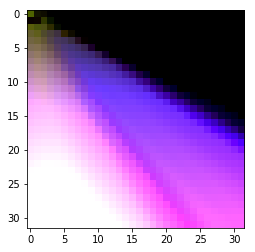

[[  4.51226282   3.09127402   8.72965622]
 [  3.70408678   4.18635654   6.69589853]
 [ 13.69713306   5.19795418  11.22271729]
 ..., 
 [ 14.11184406  18.43326569  18.02262306]
 [ 15.73819923   9.96106148  12.89351559]
 [ 21.73693085  18.92059326  19.53391266]]


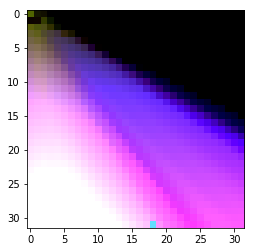

[[ 28.41829491  35.5441246   16.54338455]
 [ 19.97028923  36.14428329  23.97544289]
 [ 26.19227028  25.52449036  21.33531189]
 ..., 
 [  5.33104372  13.49703693   2.70863509]
 [ 37.61363983  39.15477753  11.86982536]
 [ 35.53743362  20.46815872   5.67735958]]


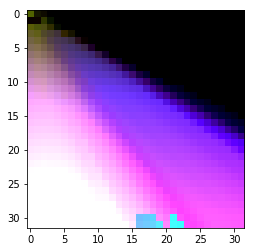

[[ 18.82450294  23.77605629  14.76486206]
 [ 19.73444557  20.69878578  17.60276413]
 [ 12.59918499  18.31115341  16.15975189]
 ..., 
 [  2.42777205  14.648592     6.0393877 ]
 [ 23.15223122  13.96258926  20.11685753]
 [ 17.5596714   15.25041771   8.59962559]]


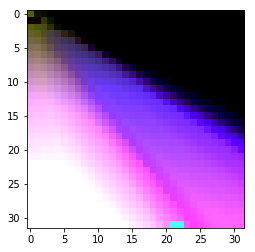

[[ 16.91904831  12.84563541  14.77903652]
 [ 14.64194489  12.14714622  14.48466682]
 [ 14.0538063   29.03395462  12.27430248]
 ..., 
 [ 16.88446808  33.84439468  17.226717  ]
 [ 10.84457779  12.86794472  19.35504532]
 [ 13.66375256  32.54941559  20.88660431]]


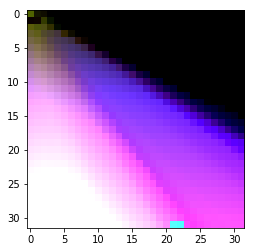

[[ 26.41615677  26.87409973   0.63283575]
 [ 20.4284153   31.13741493  34.08123398]
 [ 22.60096169  18.82481003  36.00313568]
 ..., 
 [ 20.37181091  32.65825272  22.80199242]
 [ 16.63450241  13.71487713  23.55460358]
 [ 24.72716713  29.07144928  13.97078037]]


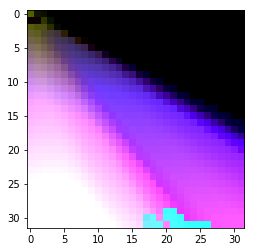

[[ 33.00143814  35.75724792  19.36632156]
 [ 27.89253426  35.31483841  36.37472153]
 [ 17.42284584  24.82265282  26.77443504]
 ..., 
 [ 15.8930645   31.4189949   27.74477959]
 [ 19.22780609  16.44037437  31.3038044 ]
 [ 25.1896534   32.93061066  35.45741272]]


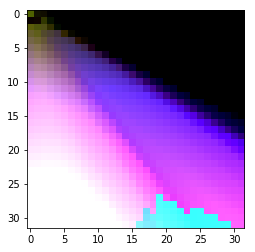

[[ 10.95011806  16.00702095  18.97084045]
 [ 17.47952652  18.86046982  22.8876133 ]
 [ 15.82799911  17.30811501  23.04643631]
 ..., 
 [ 23.26251221  18.4511013   32.47243118]
 [ 19.52894974  15.53633308  37.04366302]
 [ 25.57144356  20.22632217  42.94456482]]


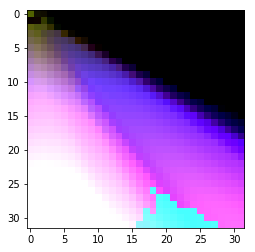

[[ 11.69696236   6.62191296   5.87036705]
 [ 11.55088139   7.79630756  10.14888573]
 [ 10.51092052   9.50022602   9.76133919]
 ..., 
 [ 16.84519005  21.50417137  20.00773621]
 [  7.10445356   5.31897354  13.67021751]
 [  8.99359512  11.26468372  16.78265572]]


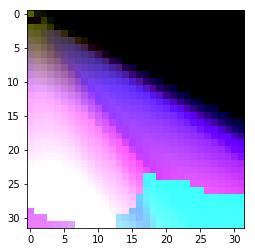

[[ 28.94452667  27.85461044  18.50738907]
 [ 27.08501053  19.32544899  22.18894577]
 [  9.79915047  19.14814186  20.24139404]
 ..., 
 [  8.33105659  20.53588104  21.37513542]
 [ 30.93285561  30.63553047  27.44464493]
 [ 29.07115746  23.30290031  29.91628838]]


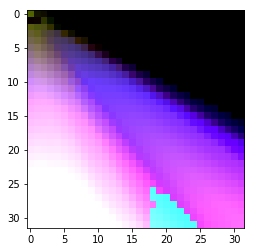

[[ 13.98803234  11.42237949  15.90359783]
 [ 12.56265259  13.83031082  14.12822342]
 [ 12.37762928  17.16818047  19.03407097]
 ..., 
 [ 13.58540726  22.92156601  19.7251358 ]
 [ 10.99661255   4.01177549   6.48843813]
 [ 23.07998466  24.02962685  21.50201797]]


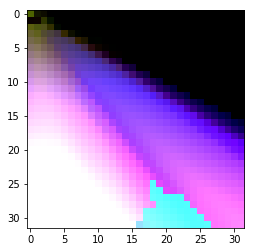

In [111]:

def gausspdf(x, mean, sigma):
    return tf.exp(-(x - mean)**2 / (2 * sigma**2)) /(tf.sqrt(2.0 * np.pi) * sigma)

current_input = X
for layer_i in range(1, len(n_neurons)):
    current_input = tfl.linear(
        inputs=current_input,
        num_outputs=n_neurons[layer_i],
        activation_fn=tf.nn.relu, 
        scope='layer/' + str(layer_i))
n_features = 3
n_gaussians = 5
means = tf.reshape(
    tfl.linear(inputs=current_input,
               num_outputs=n_features * n_gaussians,
               activation_fn=tf.nn.relu,
               scope='means'), [-1, n_features, n_gaussians])
sigmas = tf.maximum(
    tf.reshape(
        tfl.linear(inputs=current_input,
                   num_outputs=n_features * n_gaussians,
                   activation_fn=tf.nn.relu,
                   scope='sigmas'), [-1, n_features, n_gaussians]), 1e-10)
weights = tf.reshape(
    tfl.linear(inputs=current_input,
               num_outputs=n_features * n_gaussians,
               activation_fn=tf.nn.softmax,
               scope='weights'), [-1, n_features, n_gaussians])

Y_3d = tf.reshape(Y, [-1, n_features, 1])
#Now we can measure the cost like before:
p = gausspdf(Y_3d, means, sigmas)
#And apply the weighting on each Gaussian:
weighted = weights * p
#And find the sum across all Gaussians:
sump = tf.reduce_sum(weighted, 2) 
negloglike = -tf.log(tf.maximum(sump, 1e-10) )

cost = tf.reduce_mean(tf.reduce_mean(negloglike, 1))
optimizer = tf.train.AdamOptimizer(0.0005).minimize(cost)
n_iterations = 8000
batch_size = 100
init_op = tf.global_variables_initializer()
fig, ax = plt.subplots(1, 1)
xs_test=[]
for i in range(image_size):
    for j in range(image_size):
        xs_test.append([i,j])
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set W and b to their initial random normal value.
    sess.run(init_op)
    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})
            wts=sess.run(weights,feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})
            #print(xs)
        this_cost,sumpr,pr,weightsr = sess.run(
            [negloglike,sump,p,weights], feed_dict={X: xs, Y: ys})
      
        #print(it_i)
        if (it_i + 1) % 100 == 0:
            #print('cost', this_cost)
            #print('sump', sumpr)
            print(sumpr)
            #print('p',pr)
            #print('weights',weightsr)
            y_mu, y_dev, y_pi = sess.run([means, sigmas, weights],
                feed_dict={X: xs_test})
            #print(np.sum(y_pi[1]))
            if False:
                ys_pred = np.sum(y_mu * y_pi, axis=2)
                img = np.clip(ys_pred, 0, 1)
                ax.imshow(img.reshape([image_size,image_size,3]))
            else:
                ys_pred = np.array(
                    [y_mu[obv, :, idx]
                    for obv, idx in enumerate(np.argmax(y_pi.sum(1), 1))])
                img = (np.clip(ys_pred.reshape([32,32,3]), 0, 1)*255).astype(np.uint8)
                plt.imshow(img)
                plt.show()
            plt.show()
            fig.canvas.draw()